In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/home/zelin/311-service-requests.csv')


/home/zelin/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


上面显示第8列有不同类型的混合数据，查看一下第8列的唯一值

In [28]:
data['Incident Zip'].unique()

array([11432.0, 11378.0, 10032.0, 10023.0, 10027.0, 11372.0, 11419.0,
       11417.0, 10011.0, 11225.0, 11218.0, 10003.0, 10029.0, 10466.0,
       11219.0, 10025.0, 10310.0, 11236.0, nan, 10033.0, 11216.0, 10016.0,
       10305.0, 10312.0, 10026.0, 10309.0, 10036.0, 11433.0, 11235.0,
       11213.0, 11379.0, 11101.0, 10014.0, 11231.0, 11234.0, 10457.0,
       10459.0, 10465.0, 11207.0, 10002.0, 10034.0, 11233.0, 10453.0,
       10456.0, 10469.0, 11374.0, 11221.0, 11421.0, 11215.0, 10007.0,
       10019.0, 11205.0, 11418.0, 11369.0, 11249.0, 10005.0, 10009.0,
       11211.0, 11412.0, 10458.0, 11229.0, 10065.0, 10030.0, 11222.0,
       10024.0, 10013.0, 11420.0, 11365.0, 10012.0, 11214.0, 11212.0,
       10022.0, 11232.0, 11040.0, 11226.0, 10281.0, 11102.0, 11208.0,
       10001.0, 10472.0, 11414.0, 11223.0, 10040.0, 11220.0, 11373.0,
       11203.0, 11691.0, 11356.0, 10017.0, 10452.0, 10280.0, 11217.0,
       10031.0, 11201.0, 11358.0, 10128.0, 11423.0, 10039.0, 10010.0,
       11209.0,

上面的数据显示，有数值、字符串类型，要把其转换成字符串,由两种方法，可以直接在读取文件的时候就转换，或通过astype()转换


In [31]:
#通过astype转换
data['Incident Zip'] = data['Incident Zip'].astype(np.str)
data['Incident Zip'].unique()

array(['11432.0', '11378.0', '10032.0', '10023.0', '10027.0', '11372.0',
       '11419.0', '11417.0', '10011.0', '11225.0', '11218.0', '10003.0',
       '10029.0', '10466.0', '11219.0', '10025.0', '10310.0', '11236.0',
       'nan', '10033.0', '11216.0', '10016.0', '10305.0', '10312.0',
       '10026.0', '10309.0', '10036.0', '11433.0', '11235.0', '11213.0',
       '11379.0', '11101.0', '10014.0', '11231.0', '11234.0', '10457.0',
       '10459.0', '10465.0', '11207.0', '10002.0', '10034.0', '11233.0',
       '10453.0', '10456.0', '10469.0', '11374.0', '11221.0', '11421.0',
       '11215.0', '10007.0', '10019.0', '11205.0', '11418.0', '11369.0',
       '11249.0', '10005.0', '10009.0', '11211.0', '11412.0', '10458.0',
       '11229.0', '10065.0', '10030.0', '11222.0', '10024.0', '10013.0',
       '11420.0', '11365.0', '10012.0', '11214.0', '11212.0', '10022.0',
       '11232.0', '11040.0', '11226.0', '10281.0', '11102.0', '11208.0',
       '10001.0', '10472.0', '11414.0', '11223.0', '100

In [32]:
#读取文件的时候转换
data = pd.read_csv('/home/zelin/311-service-requests.csv',dtype={'Incident Zip': str})
data['Incident Zip'].unique()

array(['11432', '11378', '10032', '10023', '10027', '11372', '11419',
       '11417', '10011', '11225', '11218', '10003', '10029', '10466',
       '11219', '10025', '10310', '11236', nan, '10033', '11216', '10016',
       '10305', '10312', '10026', '10309', '10036', '11433', '11235',
       '11213', '11379', '11101', '10014', '11231', '11234', '10457',
       '10459', '10465', '11207', '10002', '10034', '11233', '10453',
       '10456', '10469', '11374', '11221', '11421', '11215', '10007',
       '10019', '11205', '11418', '11369', '11249', '10005', '10009',
       '11211', '11412', '10458', '11229', '10065', '10030', '11222',
       '10024', '10013', '11420', '11365', '10012', '11214', '11212',
       '10022', '11232', '11040', '11226', '10281', '11102', '11208',
       '10001', '10472', '11414', '11223', '10040', '11220', '11373',
       '11203', '11691', '11356', '10017', '10452', '10280', '11217',
       '10031', '11201', '11358', '10128', '11423', '10039', '10010',
       '11209',

然后发现，上面的数据，除了正常的和nan，还有全为0、'NO CLUE'等，还有一些超过5位长度的，都要处理

超过5位的用np.str.slice()处理
全为0、'NO CLUE'的转换成nan

In [44]:
na_value = ['NO CLUE','000000','00000',]
data=pd.read_csv('/home/zelin/311-service-requests.csv',dtype={'Incident Zip':str},na_values=na_value)

data['Incident Zip']=data['Incident Zip'].str.slice(0,5)
data['Incident Zip'].unique()


array(['11432', '11378', '10032', '10023', '10027', '11372', '11419',
       '11417', '10011', '11225', '11218', '10003', '10029', '10466',
       '11219', '10025', '10310', '11236', nan, '10033', '11216', '10016',
       '10305', '10312', '10026', '10309', '10036', '11433', '11235',
       '11213', '11379', '11101', '10014', '11231', '11234', '10457',
       '10459', '10465', '11207', '10002', '10034', '11233', '10453',
       '10456', '10469', '11374', '11221', '11421', '11215', '10007',
       '10019', '11205', '11418', '11369', '11249', '10005', '10009',
       '11211', '11412', '10458', '11229', '10065', '10030', '11222',
       '10024', '10013', '11420', '11365', '10012', '11214', '11212',
       '10022', '11232', '11040', '11226', '10281', '11102', '11208',
       '10001', '10472', '11414', '11223', '10040', '11220', '11373',
       '11203', '11691', '11356', '10017', '10452', '10280', '11217',
       '10031', '11201', '11358', '10128', '11423', '10039', '10010',
       '11209',

另外，按照北美地区邮编规则，一般是以0,1,3开头，其他开头的都要改成nan


In [115]:
na_value = ['NO CLUE','000000','00000',]
data=pd.read_csv('/home/zelin/311-service-requests.csv',dtype={'Incident Zip':str},na_values=na_value)

data['Incident Zip']=data['Incident Zip'].str.slice(0,5)

is_start_1 = data['Incident Zip'].str.startswith('1',na=False) # 遇到缺失值返回False
is_start_0 = data['Incident Zip'].str.startswith('0',na=False)
is_start_3 = data['Incident Zip'].str.startswith('3',na=False)
fake_val_bool = ~(is_start_1 | is_start_0 | is_start_3) 
data.loc[fake_val_bool,'Incident Zip'] = np.nan
data['Incident Zip'].unique()
print(type(fake_val_bool))

<class 'pandas.core.series.Series'>


In [107]:
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


([], <a list of 0 Text yticklabel objects>)

<Figure size 648x432 with 0 Axes>

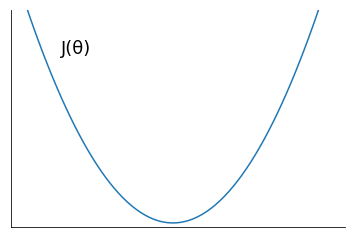

In [101]:


x=np.arange(1,8,0.1)
y=(3*x-13)**2+2
plt.figure(figsize=(9,6))
fig, ax=plt.subplots()
plt.ylim(0,100)
plt.plot(x,y)
plt.text(1.8,80,'J(θ)',fontsize=18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks([])
plt.yticks([])
